##Implementation of K-Means Clustering Algorithm
K-Means is unsupervised learning algorithm, used to find intrinsic groups within the unlabbled dataset and draw inferences from them. The algorithm follows a simple way of classifying a given data set through a certain number of clusters. It works iterativerly to assign each data point to one of the K-groups based on the features that are provided to it. 

 *Or in simpler terms Data points are clustered based on feature similarity*

In [81]:
#importing the neccessary Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
#Opening and reading the dataset and printing the size of rows and colums
df = pd.read_csv('/content/drive/MyDrive/Data Mining/K-Means Algorithm/data.csv')
df.shape

(10000, 14)

In [83]:
#Reading the csv file and look at the first ficve rows of the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Here we will be selecting two variables from the given data set **Age & CreditScore** and visualize it on a scatter map. In the same folder you may find a notebook named **Data_Exploration.ipynb** where you can see multiple visualizaiton elements of the given dataset.  

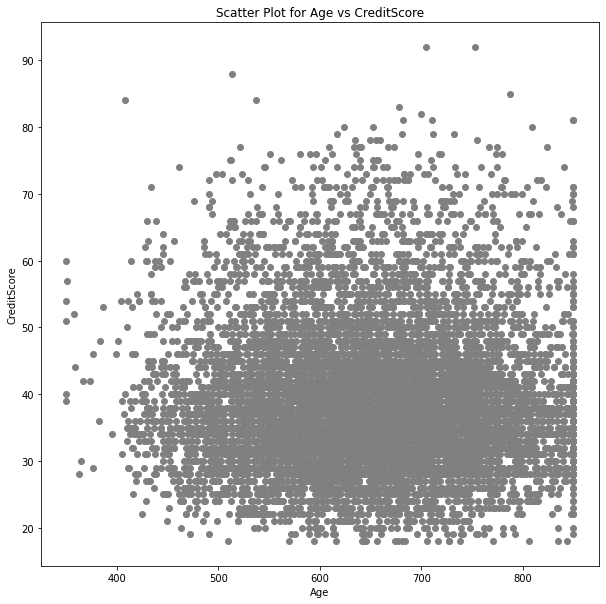

In [84]:
X = df[["Age", "CreditScore"]]

#visualizing data
plt.figure(figsize =(10,10))
plt.scatter(X["CreditScore"],X["Age"], color ='Grey')
plt.title('Scatter Plot for Age vs CreditScore')
plt.xlabel('Age')
plt.ylabel('CreditScore')
plt.show()

The property of clusters states that the points within a cluster should be similar to each other, thus the main aim is to minimize the distance between the points within a cluster. K-means is a centroid based algorithm or distance based algorithm, where we calculate the distance to assing a point to a cluster. Each point is associated with a centroid.

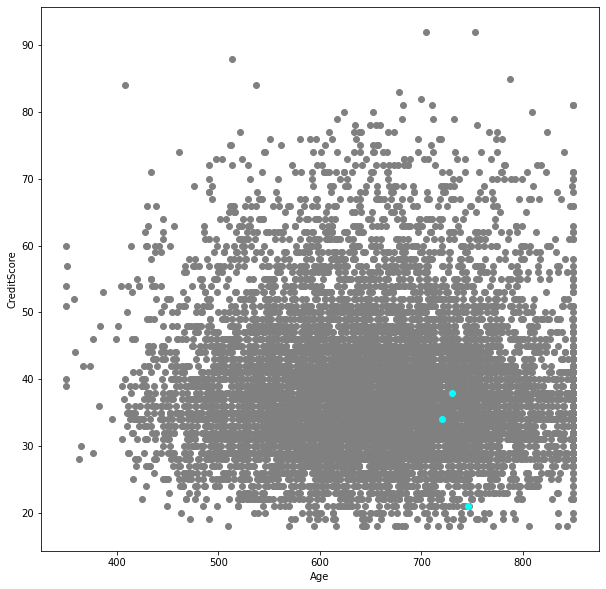

In [85]:
#The first step in k-means is picking the number of cluster k or n_cluster
n_clusters = 3 

#Since k-means is a centroid based algorithm, we are setting centroid to be a random selection of k numbers in the cluster
centroids = (X.sample(n = n_clusters))

#Visualizing the centroid inside the clusters
plt.figure(figsize =(10,10))
plt.scatter(X["CreditScore"],X["Age"], color = 'grey')
plt.scatter(centroids["CreditScore"],centroids["Age"], color ='cyan')
plt.xlabel('Age')
plt.ylabel('CreditScore')
plt.show()


In [86]:

#since the centroids are picked at random, it will be a different number everytime the code is run
centroids

,Age,CreditScore
7923,38,730
3611,21,746
9668,34,720


Once we have initialized the centroids, we assign each point to the closest cluster centroid and then compute the centroids of the newlyformed clusters. We will be iterating through this process until the centroids of thenewly formed clusters are not changing. If the results are the same centriods for all the clusters, it could be said that the algorithm is not learning any new pattern and should stop.

In [89]:
diff = 1
j=0

while(diff!=0):
    XD = X
    count = 1
#Assigning all the points to the closest cluster centroid
    for first_index, row_c in centroids.iterrows():
        Euclidean_Distance = []
        for second_index, row_d in XD.iterrows():
            #Computing the Euclidean Distance
            f_data = ( (row_c["CreditScore"]) - (row_d["CreditScore"])) **2
            s_data = ( (row_c["Age"]) - (row_d["Age"])) **2
            distance = np.sqrt(f_data + s_data)
            Euclidean_Distance.append(distance)

        X[i] = Euclidean_Distance
        count += 1


#Recomputing centroids of the newly formed Clusters 
    C=[]
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    new_centroids = X.groupby(["Cluster"]).mean()[["Age","CreditScore"]]


#The algorithm is going to stop if there is no difference between the centroid of the newly formed clusters
#and if the maximum number of iteration is reached
    if j == 0:
        diff = 1
        j += 1
    else:
        diff = (new_centroids['Age'] - centroids['Age']).sum() + (new_centroids['CreditScore'] - centroids['CreditScore']).sum()
        print(diff.sum())
    centroids = X.groupby(["Cluster"]).mean()[["Age","CreditScore"]] 

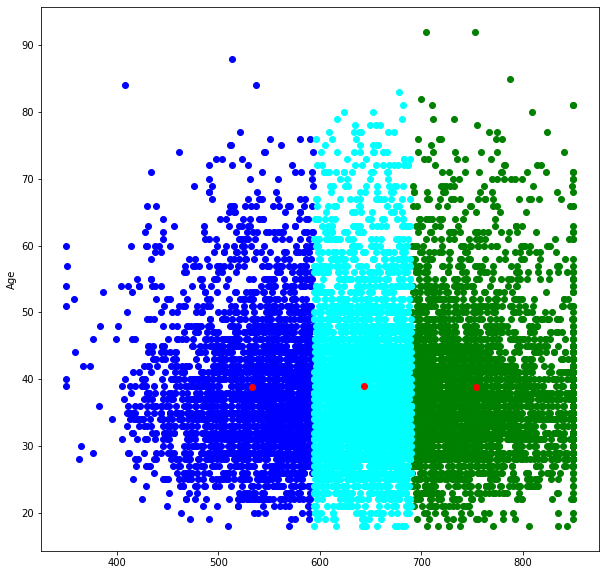

In [71]:
color=['blue','green','cyan']

plt.figure(figsize =(10,10))
for k in range(n_clusters):
    data = X [X["Cluster"] == k+1]
    plt.scatter(data["CreditScore"],data["Age"],c=color[k])


plt.scatter(centroids["CreditScore"],centroids["Age"],c='red')
plt.xlabel('')
plt.ylabel('Age')
plt.show()



